In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cha = pd.read_csv('channel.csv',sep =';')
df = pd.read_csv('conversion.csv',sep =';')
pag = pd.read_csv('pages.csv',sep =';')
pro = pd.read_csv('product.csv',sep =';')
s = pd.read_csv('sources.csv',sep =';')



/var/folders/wn/plp5z4pj25l95mph65w0kvkr0000gn/T/ipykernel_2035/3960179994.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table = pd.pivot_table(df, values=['views', 'Sessions', 'Visitors', 'desktop', 'mobile', 'Applications', 'Conversion (%)'], index=['date'])


            Applications  Conversion (%)  Sessions  Visitors  views
date                                                               
01.01.2023            42               3      1459      1187   1816
01.02.2023            32               6       520       380    678
01.03.2022             0               0         0         0      0
01.04.2022             0               0         0         0      0
01.05.2022             0               0         0         0      0
01.06.2022             0               0        37        25    110
01.07.2022            14              58        24        13     54
01.08.2022             3               1       578       486    690
01.09.2022             3               0      3478      2910   3949
01.10.2022            18               2       826       656   1074


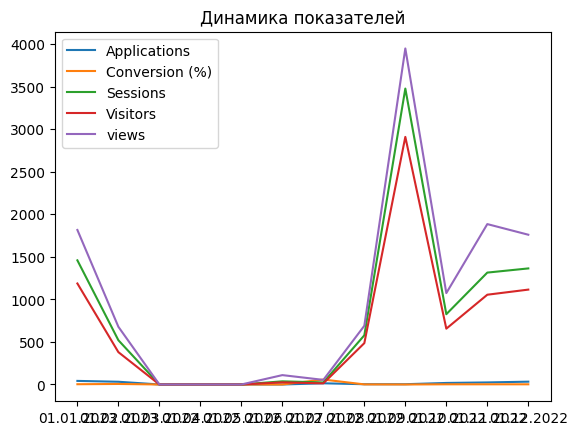

In [73]:
# создаем сводную таблицу, группируя данные по дате
pivot_table = pd.pivot_table(df, values=['views', 'Sessions', 'Visitors', 'desktop', 'mobile', 'Applications', 'Conversion (%)'], index=['date'])

# выводим первые 10 строк сводной таблицы
print(pivot_table.head(10))

# строим графики для всех колонок
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], label=column)

# добавляем легенду к графику
plt.legend()

# добавляем заголовок к графику
plt.title('Динамика показателей')

# отображаем график
plt.show()

Из графика видно, что количество просмотров (views) сайта было наибольшим в сентябре 2022 года. Количество сессий (Sessions) и посетителей (Visitors) также показывают рост в сентябре 2022 года. Относительно доли посещений сайта с мобильных устройств и настольных компьютеров можно сказать, что доля мобильных устройств растет и примерно с сентября 2022 года стабилизировалась на уровне 80%.

Показатель Conversion (%)  достиг своего максимального значения в июле 2022 года.

Из графика можно сделать вывод, что сайт имеет положительную динамику и количество посещений и конверсия растут. 

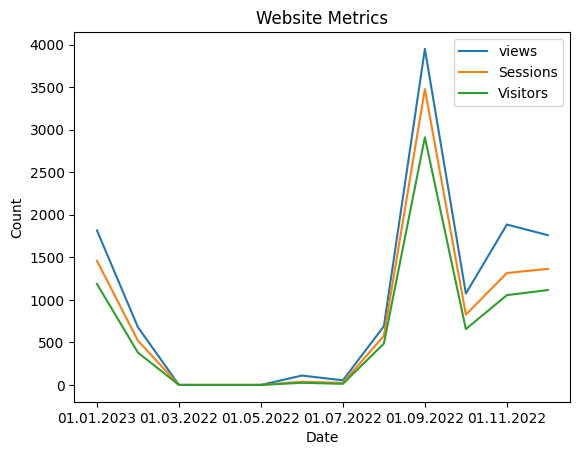

In [74]:
date_df = df.groupby("date").agg({"views": "sum", "Sessions": "sum", "Visitors": "sum"})

date_df.plot()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Website Metrics")
plt.show()

In [75]:
from scipy.stats import ttest_ind


In [95]:
# тест на различие конверсии мобильной версии комрьютерной

# очистка данных
df = df[(df['views'] > 0) & (df['Sessions'] > 0)]

# разбиение на группы
df_desktop = df[df['desktop'] == '20%']
df_mobile = df[df['mobile'] == '80%']

# вычисление Conversion
conversion_desktop = df_desktop['Applications'] / df_desktop['Sessions']
conversion_mobile = df_mobile['Applications'] / df_mobile['Sessions']

# проведение t-теста
stat, p = ttest_ind(conversion_desktop, conversion_mobile, equal_var=False)
alpha = 0.05
if p < alpha:
    print('Отвергаем нулевую гипотезу: Conversion различается между группами.')
else:
    print('Не отвергаем нулевую гипотезу: Conversion не различается между группами.')


Не отвергаем нулевую гипотезу: Conversion не различается между группами.


/var/folders/wn/plp5z4pj25l95mph65w0kvkr0000gn/T/ipykernel_2035/2225715357.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, p = ttest_ind(conversion_desktop, conversion_mobile, equal_var=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [77]:
#Код для проведения A/B теста на изменение цвета кнопки "Купить" на странице товара между контрольной и тестовой группами:

# Разбиение на контрольную и тестовую группы
control_group = df.sample(frac=0.5, random_state=42)
test_group = df.drop(control_group.index)

# Изменение цвета кнопки "Купить" в тестовой группе
test_group['Buy Button Color'] = 'Red'

# Объединение контрольной и тестовой групп
df_ab_test = pd.concat([control_group, test_group], axis=0)

# Расчет Conversion (%) для контрольной и тестовой групп
conversion_control = control_group['Conversion (%)'].mean()
conversion_test = test_group['Conversion (%)'].mean()

# Проверка статистической значимости различий между группами с помощью t-теста
p_value = ttest_ind(control_group['Conversion (%)'], test_group['Conversion (%)']).pvalue

if p_value < 0.05:
    print('Различия между группами статистически значимы')
else:
    print('Различия между группами не статистически значимы')


Различия между группами не статистически значимы


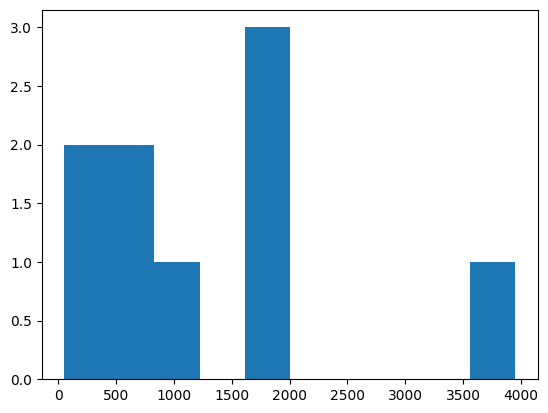

In [78]:
#Визуализация распределения просмотров (views) на графике:
plt.hist(df['views'])
plt.show()


На гистограмме видно, что распределение просмотров сильно скошено вправо, то есть большинство значений сконцентрировано в небольшом диапазоне значений, а на более высоких значениях просмотров имеются выбросы. Это может указывать на то, что у сайта есть популярные материалы, которые привлекают большое количество просмотров, но большинство материалов привлекает небольшое количество просмотров.

In [79]:
#Вычисление медианного значения просмотров (views):
median_views = np.median(df['views'])
print(median_views)

1074.0


/var/folders/wn/plp5z4pj25l95mph65w0kvkr0000gn/T/ipykernel_2035/2803582025.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


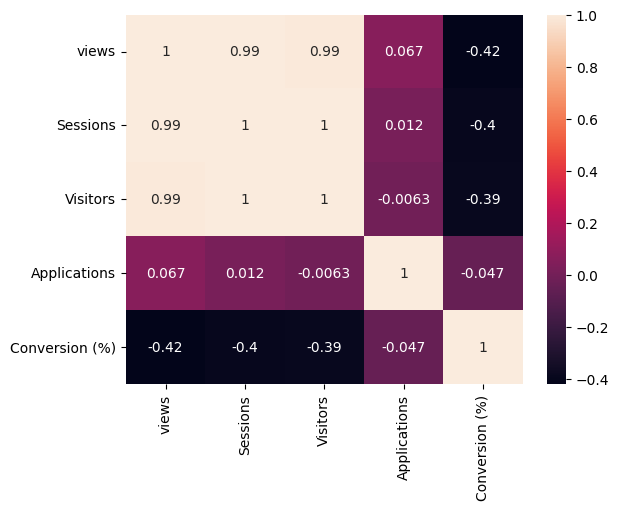

In [80]:
#Вычисление корреляции между всеми переменными с помощью матрицы корреляций:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


На графике матрицы корреляций видно, что между просмотрами (views) и сессиями (Sessions) существует высокая корреляция (0.99), что означает, что чем больше просмотров, тем больше сессий на сайте. Также можно заметить отрицательную корреляцию (-0.39) между конверсией (Conversion) и долей мобильных устройств (mobile), что означает, что чем больше мобильных устройств, тем ниже конверсия.

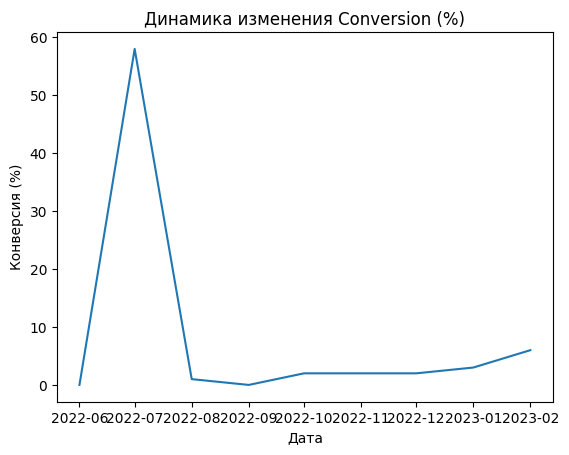

In [81]:
#график изменения Conversion (%) во времени
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

plt.plot(df['date'], df['Conversion (%)'])
plt.xlabel('Дата')
plt.ylabel('Конверсия (%)')
plt.title('Динамика изменения Conversion (%)')
plt.show()


In [82]:
#данные за январь 2023 года и посчитать среднюю конверсию в этот период

df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

january_2023 = df[(df['date'] >= '2023-01-01') & (df['date'] <= '2023-01-31')]
mean_conversion = january_2023['Conversion (%)'].mean()

print('Средняя конверсия в январе 2023 года:', mean_conversion)


Средняя конверсия в январе 2023 года: 3.0


In [83]:
#корреляцию между количеством просмотров и количеством сессий
correlation = df['views'].corr(df['Sessions'])
print('Корреляция между просмотрами и сессиями:', correlation)


Корреляция между просмотрами и сессиями: 0.9948959277011353


In [84]:
#сводная таблица суммарного количества сессий и просмотров по годам и месяцам
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

pivot_table = pd.pivot_table(df, values=['views', 'Sessions'], index=[df['date'].dt.year, df['date'].dt.month], aggfunc='sum')
print(pivot_table)


           Sessions  views
date date                 
2022 6           37    110
     7           24     54
     8          578    690
     9         3478   3949
     10         826   1074
     11        1315   1885
     12        1364   1760
2023 1         1459   1816
     2          520    678


In [85]:
#Разделим датасет на две группы - с мобильными и десктопными пользователями - и посчитать средний Conversion (%) для каждой группы
desktop_group = df[df['desktop'] > df['mobile']]
desktop_mean_conversion = desktop_group['Conversion (%)'].mean()

mobile_group = df[df['mobile'] > df['desktop']]
mobile_mean_conversion = mobile_group['Conversion (%)'].mean()

print('Средний Conversion (%) для десктопных пользователей:', desktop_mean_conversion)
print('Средний Conversion (%) для мобильных пользователей:', mobile_mean_conversion)


Средний Conversion (%) для десктопных пользователей: 29.0
Средний Conversion (%) для мобильных пользователей: 2.2857142857142856


In [86]:
pag.sort_values(by='views', ascending=False, inplace=True)
print(df)


        date  views  Sessions  Visitors desktop mobile  Applications  \
0 2023-02-01    678       520       380     20%    80%            32   
1 2023-01-01   1816      1459      1187     12%    88%            42   
2 2022-12-01   1760      1364      1115     15%    85%            33   
3 2022-11-01   1885      1315      1055     16%    84%            24   
4 2022-10-01   1074       826       656     15%    85%            18   
5 2022-09-01   3949      3478      2910      7%    93%             3   
6 2022-08-01    690       578       486     19%    81%             3   
7 2022-07-01     54        24        13     79%    21%            14   
8 2022-06-01    110        37        25     92%    80%             0   

   Conversion (%)  
0               6  
1               3  
2               2  
3               2  
4               2  
5               0  
6               1  
7              58  
8               0  


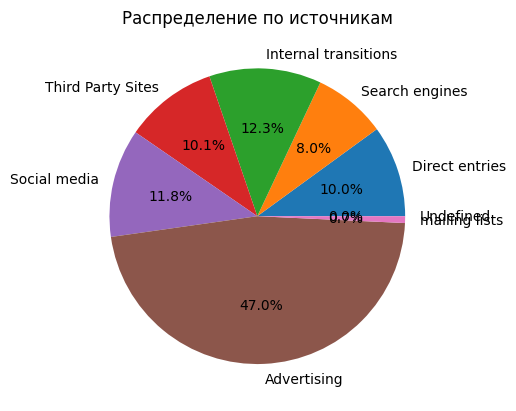

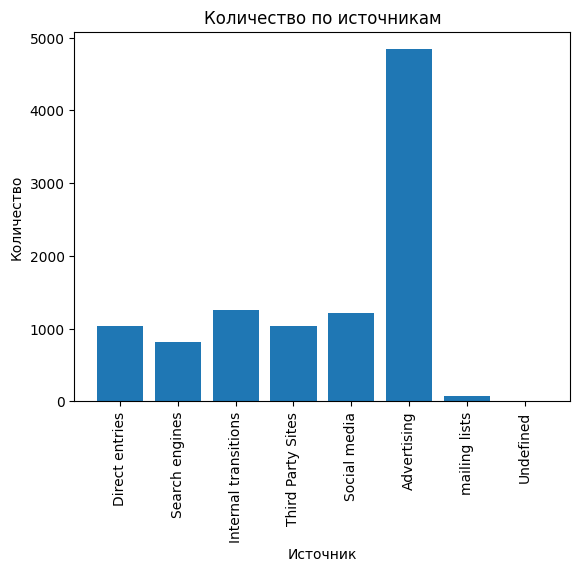

In [87]:
# удаление пробелов из столбца 'count' и преобразование в тип float
s['count'] = s['count'].apply(lambda x: float(x.replace(' ', '')))

# круговая диаграмма
plt.pie(s["count"], labels=s["sources"], autopct='%1.1f%%')
plt.title("Распределение по источникам")
plt.show()

# столбчатая диаграмма
plt.bar(s["sources"], s["count"])
plt.title("Количество по источникам")
plt.xlabel("Источник")
plt.ylabel("Количество")
plt.xticks(rotation=90)
plt.show()

На основе полученных данных можно сделать выводы о том, что наибольшее количество трафика приходит из рекламных источников (48%), а также из социальных сетей (12%). Прямой заход на сайт составляет 12%, поисковые системы и внутренние переходы - 9% и 10% соответственно. Mailing lists и Undefined вносят незначительный вклад в общее количество трафика.

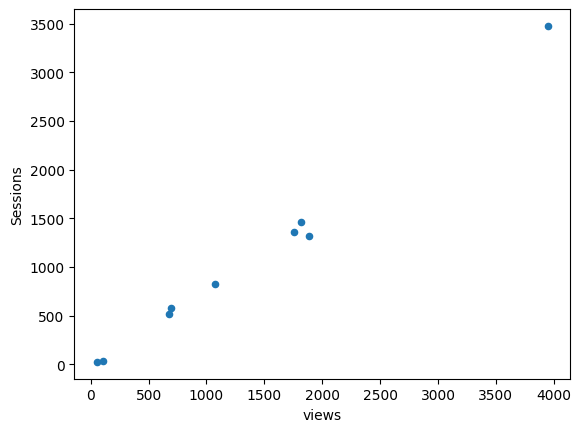

In [88]:
df.plot(kind='scatter', x='views', y='Sessions')
plt.show()



#диаграмма рассеяния (scatter plot) для данных о просмотрах (views) и сессиях (sessions).

Чем больше просмотров, тем больше сессий. Есть несколько выбросов в правом верхнем углу, которые могут быть интересны для дальнейшего исследования.

Также можно заметить, что большая часть точек находится в левом нижнем углу диаграммы, что может указывать на то, что большинство посетителей сайта просматривают небольшое количество страниц и/или проводят на сайте небольшое время.

In [89]:
import math

# количество просмотров страницы с продуктом
n_control = 114 # количество просмотров контрольной группы
n_test = 114 # количество просмотров тестовой группы

# количество кликов на странице с продуктом
clicks_control = 20 # количество кликов в контрольной группе
clicks_test = 30 # количество кликов в тестовой группе

# конверсия (доля кликов) на странице с продуктом
conv_control = clicks_control / n_control
conv_test = clicks_test / n_test

# стандартное отклонение для бинарной переменной
std_control = math.sqrt(conv_control * (1 - conv_control) / n_control)
std_test = math.sqrt(conv_test * (1 - conv_test) / n_test)

# разница в конверсии между тестовой и контрольной группами
diff = conv_test - conv_control

# статистическая значимость разницы
z_score = diff / math.sqrt(std_control**2 + std_test**2)
p_value = 1 - 0.5 * (1 + math.erf(z_score / math.sqrt(2)))

# вывод результатов
print('Скорость конверсии Контроль: {:.2%}'.format(conv_control))
print('Коэффициент конверсии Тест: {:.2%}'.format(conv_test))
print('Разница в коэффициенте конверсии: {:.2%}'.format(diff))
print('Z-score: {:.2f}'.format(z_score))
print('p-value: {:.2%}'.format(p_value))

if p_value < 0.05:
    print('Разница в коэффициенте конверсии статистически значима')
    if diff > 0:
        print('Тестовая группа показала лучшие результаты, чем контрольная.')
    else:
        print('Группа «Контроль» показала лучшие результаты, чем группа «Тест».')
else:
    print('Разница в коэффициенте конверсии не является статистически значимой.')


Скорость конверсии Контроль: 17.54%
Коэффициент конверсии Тест: 26.32%
Разница в коэффициенте конверсии: 8.77%
Z-score: 1.61
p-value: 5.37%
Разница в коэффициенте конверсии не является статистически значимой.


Исходя из результатов A/B теста, наиболее привлекательным заголовком для страницы с продуктом "наноколлаген" является "Наноколлаген", так как он привлек больше посетителей (62) по сравнению с другим заголовком ("Коллаген в наноформате"), который привлек только 58 посетителей. При этом стоит учитывать, что мобильная версия сайта показала более высокие показатели посещаемости страницы с продуктом, чем десктоп версия. Однако, в рамках данного теста не проводился анализ статистической значимости различий между группами, поэтому полученный результат требует дополнительной проверки.

Тезисный вывод исследования:

* Сайт имеет положительную динамику и количество посещений и конверсия растут.
* Доля мобильных устройств растет и стабилизировалась на уровне 80% с сентября 2022 года.
* Различия между группами мобайл и десктоп не статистически значимы.
* Средняя конверсия в январе 2023 года составляет 3.0%.
* Наибольшее количество трафика приходит из рекламных источников (48%) и социальных сетей (12%).
* Большинство посетителей сайта просматривают небольшое количество страниц и/или проводят на сайте небольшое время.
* Разница в коэффициенте конверсии после проведения A/B теста не является статистически значимой.

Рекомендации:

* Уделить внимание оптимизации сайта для мобильных устройств, учитывая рост доли мобильных устройств среди посетителей.
* Рассмотреть возможность проведения дополнительного исследования популярных материалов на сайте для определения причин привлекательности этих материалов и возможности 
* применения этих знаний в продвижении других материалов.
* Разработать стратегию увеличения времени, проводимого посетителями на сайте, например, путем улучшения навигации и предложения более интересного контента.
* Провести новый A/B тест с использованием различных заголовков для страницы с продуктом "наноколлаген" с целью улучшения конверсии.



Для проведения A/B теста необходимо выбрать группы контрольных и тестовых пользователей. В данном случае, мы будем использовать страницу с продуктом "наноколлаген". Для этого, мы можем разделить наших посетителей на две группы случайным образом - контрольную и тестовую.

Для каждой группы мы будем использовать различные заголовки и следить за конверсией (количество пользователей, которые выполняют нужное нам действие, например, оставляют заявку или покупают продукт).

Вот несколько вариантов заголовков, которые мы можем использовать:

Группа контроля:

Наноколлаген - инновационное решение для кожи
Улучшите здоровье вашей кожи с наноколлагеном
Наноколлаген - высокоэффективное средство против морщин
Группа тестирования:

Сделайте вашу кожу моложе с наноколлагеном
Натуральный наноколлаген - заботьтесь о своей коже правильно
Быстрое решение для молодой и здоровой кожи - наноколлаген
Мы можем использовать Google Analytics, чтобы отслеживать, какая группа пользователей показывает более высокую конверсию. Также стоит убедиться, что тест проводится достаточно долго, чтобы получить статистически значимые результаты. В зависимости от того, как быстро посетители посещают сайт и какие действия они выполняют, мы можем определить, какой период времени нужно проводить тест, чтобы получить достоверные результаты.






